# Choose a Data Set
Pick one of the following data sets to analyze for your final project. 
- [Cosmetics](https://drive.google.com/drive/folders/1qvmRfGb7a_pYAtgW6614gxlP-bxl_Ptz?usp=drive_link)
- [Mental Health](https://drive.google.com/drive/folders/1YOp1aQVcmqlAkUEGHNPl_TyNXbY-xHwO?usp=drive_link)
- [Pokemon](https://drive.google.com/drive/folders/1kDu2oRgm_hUW5hdM0tHnMUqCGSKUYT1v?usp=drive_link)
- [Ramen](https://drive.google.com/drive/folders/1Y4_5QHOCy8rHc5EsEwDUuoCfp2WLo-MN?usp=drive_link)
- [Student Performance](https://drive.google.com/drive/folders/1fE31Ka38AnGpgfI_Es3z4psuA0phhH0Y?usp=drive_link)

# My Question

***Write your question here.***

### Out of the different levels of motivation, who had the most students and what was the average exam score for each group? What level had the highest average exam score and what are the scores within its 1st standard deviation?

# My Analysis

In [5]:
# Write all the code needed for your analysis here. 
# You can add more cells to this section if you would like.

import pandas as pd
import seaborn as sns
import numpy as np
df =pd.read_csv("students.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
df["Motivation_Level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

## This is the relative freq table!

In [9]:
low = 0

medium = 0

high  = 0

for idx in range(len(df)):
    if df.loc[idx]["Motivation_Level"] == "Low":
        low += 1
    elif df.loc[idx]["Motivation_Level"] == "Medium":
        medium += 1
    elif df.loc[idx]["Motivation_Level"] == "High":
        high += 1
        
level_motivation = ["Low", "Medium", "High"]
counts = [low / len(df["Motivation_Level"])* 100, medium / len(df["Motivation_Level"])* 100, high / len(df["Motivation_Level"])* 100]

freqTable = pd.DataFrame({
    "Motivation Level": level_motivation,
    "Count": counts
})

In [10]:
freqTable

,Motivation Level,Count
0,Low,29.317391
1,Medium,50.718934
2,High,19.963675


In [11]:
# This makes the freTable in the code above useless correct?
df["Motivation_Level"].value_counts()

Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

## Going to find the mean/average of each group

In [13]:
df_low = df[df["Motivation_Level"] == "Low"]
df_medium = df[df["Motivation_Level"] == "Medium"]
df_high = df[df["Motivation_Level"] == "High"]



In [14]:
low_mean = df_low["Exam_Score"].mean()
medium_mean = df_medium["Exam_Score"].mean()
high_mean = df_high["Exam_Score"].mean()

print("Low Mean:", low_mean, " Medium Mean:", medium_mean, " High Mean:", high_mean)

Low Mean: 66.75219411461022  Medium Mean: 67.33064756789018  High Mean: 67.70432145564821


### This is a histogram/barplot just for show.

<Axes: xlabel='Motivation_Level', ylabel='Count'>

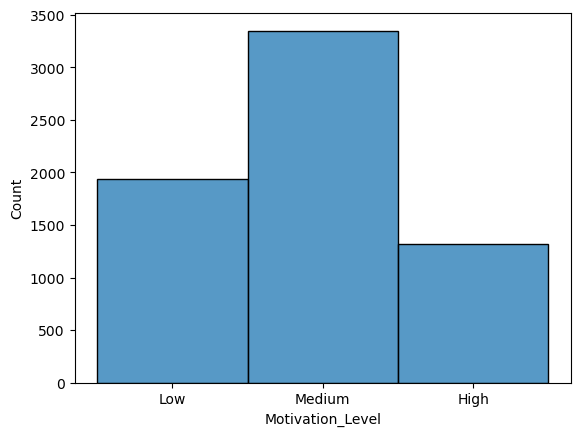

In [16]:
sns.histplot(data=df, x="Motivation_Level", bins=50)

<Axes: xlabel='Exam_Score', ylabel='Count'>

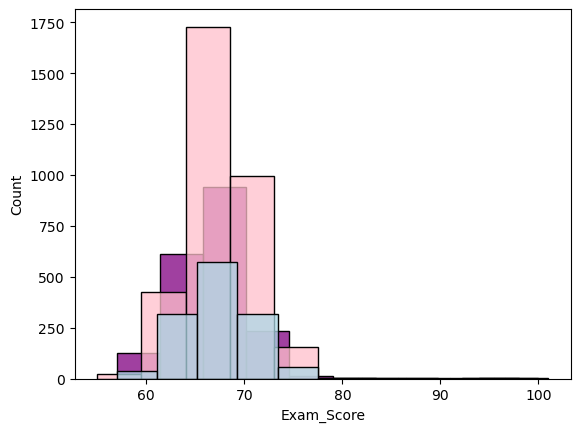

In [17]:
sns.histplot(data=df_low["Exam_Score"], bins=10, color="purple")    #LOW
sns.histplot(data=df_medium["Exam_Score"], bins=10, color="pink")    #MEDIUM
sns.histplot(data=df_high["Exam_Score"], bins=10, color="lightblue")   #HIGH

### This is where we will find the standard deviation and the scores within.

In [40]:
df_high["Exam_Score"].std()

3.8769664712893053

In [54]:
min_std = df_high["Exam_Score"].mean() - df_high["Exam_Score"].std()
max_std = df_high["Exam_Score"].mean() + df_high["Exam_Score"].std()

print("The test scores within the 1st standard deviation range from", min_std, "to", max_std)

The test scores within the 1st standard deviation range from 63.827354984358905 to 71.58128792693752


In [20]:
summary = {
    "Max": df_high["Exam_Score"].max(),
    "Q3": df_high["Exam_Score"].quantile(0.75),
    "Median": df_high["Exam_Score"].median(),
    "Q1": df_high["Exam_Score"].quantile(0.75),
    "Min": df_high["Exam_Score"].min()
}
summary

{'Max': 98, 'Q3': 70.0, 'Median': 67.0, 'Q1': 70.0, 'Min': 57}

### The graphs below are reexpressed with log because I wanted to test it out for fun. They still work!

<Axes: xlabel='Exam_Score', ylabel='Count'>

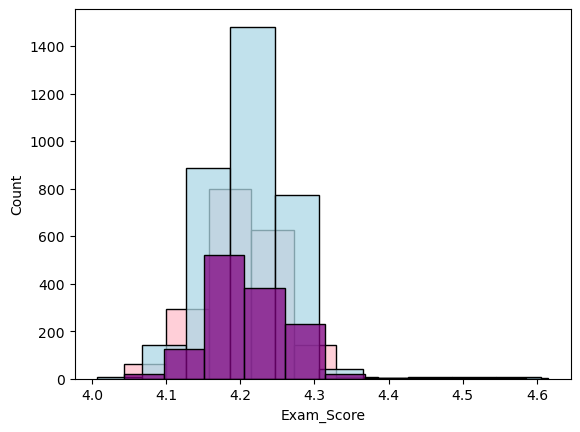

In [38]:
sns.histplot(data=np.log(df_low["Exam_Score"]), bins=10, color="pink")   #LOW
sns.histplot(data=np.log(df_medium["Exam_Score"]), bins=10, color="lightblue")   #MEDIUM
sns.histplot(data=np.log(df_high["Exam_Score"]), bins=10, color="purple")    # HIGH



# My Answer

***Write your answer here.***
### The Motivation Level group with the most students is the Medium motivation, which covers 50.7% of all the students, if we look at a relative frequency table. The average exam score for the Low Motivation group was 66.75219411461022, the average score for the Medium Motivation group was 67.33064756789018 and the average score for the High Motivated group was 67.70432145564821. The High Motivation level group had the highest average score with a 67.70432145564821, just a bit more higher than the Medium level motivated students, we can somewhat see it when we look at a 5-number summary, the median is 67(exam score). The exam scores within the 1st standard deviation for the High level motivation group ranges from 63.827354984358905 to 71.58128792693752. 

### Extra: It could be that the reason why the average scores for the High and Medium level motivated groups is because the Medium level group contains a vast majority of the students, since it does cover around 50% of them. With this data set, if a student is highly motivated or atleast medium level motivated, they can earn somewhat of an average score or more.
 